**‘DataScience FinHack’ organized by L&T Financial Services**

In this FinHack, the goal is to develop a model for LTFS's most common but real challenge **‘Loan Default Prediction’**

In [ ]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/AV_LTFS_Hackathon/train.csv')

In [ ]:
df_train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [ ]:
pd.options.display.max_columns = None

df_train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


#EDA

In [ ]:
# Dataset dimensions
print(df_train.shape)
#print(heberman.head())
print("*"*57)
print("Column Data types:")
print(df_train.dtypes)

(233154, 41)
*********************************************************
Column Data types:
UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE

In [ ]:
# Dataset Description
print(df_train.describe())

            UniqueID  disbursed_amount    asset_cost            ltv  \
count  233154.000000     233154.000000  2.331540e+05  233154.000000   
mean   535917.573376      54356.993528  7.586507e+04      74.746530   
std     68315.693711      12971.314171  1.894478e+04      11.456636   
min    417428.000000      13320.000000  3.700000e+04      10.030000   
25%    476786.250000      47145.000000  6.571700e+04      68.880000   
50%    535978.500000      53803.000000  7.094600e+04      76.800000   
75%    595039.750000      60413.000000  7.920175e+04      83.670000   
max    671084.000000     990572.000000  1.628992e+06      95.000000   

           branch_id    supplier_id  manufacturer_id  Current_pincode_ID  \
count  233154.000000  233154.000000    233154.000000       233154.000000   
mean       72.936094   19638.635035        69.028054         3396.880247   
std        69.834995    3491.949566        22.141304         2238.147502   
min         1.000000   10524.000000        45.000000    

In [ ]:
# Class Values
print(df_train["Employment.Type"].value_counts())
print(df_train["loan_default"].value_counts())

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64
0    182543
1     50611
Name: loan_default, dtype: int64


In [ ]:
df_train["Employment.Type"] = df_train["Employment.Type"].map({0:"Self employed", 1:"Salaried"})

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


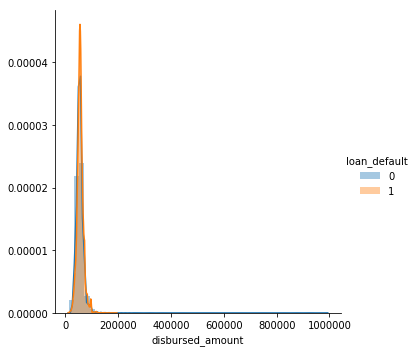

In [ ]:
#Histogram and PDF Analysis
sns.FacetGrid(df_train, hue="loan_default", size=5).map(sns.distplot, "disbursed_amount").add_legend()
plt.show();

In [ ]:
#Survived = heberman.loc[heberman["Survival_Status"] == "Survived"];
df_outlier = df_train.loc[df_train["disbursed_amount"]>200000]


In [ ]:
df_outlier

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
86675,629503,987354,1328954,75.25,2,24670,156,2378,15-08-91,NaN,...,0,0,23836,0,2,1,0yrs 9mon,1yrs 11mon,3,0
192606,556040,332045,459625,72.89,138,15306,49,3388,21-09-93,NaN,...,0,0,0,0,0,0,1yrs 5mon,1yrs 6mon,0,0
210250,488582,315904,378092,84.64,138,24062,152,3367,12-05-88,NaN,...,0,0,11033,0,0,0,3yrs 2mon,6yrs 2mon,0,0
210252,440173,990572,1628992,61.39,138,24062,152,3368,16-06-90,NaN,...,0,0,6224,0,0,0,5yrs 10mon,5yrs 10mon,0,0
210253,585144,318533,388025,84.79,138,24062,152,3321,30-12-73,NaN,...,0,0,45117,0,3,0,1yrs 5mon,5yrs 7mon,1,0
210254,560171,237779,383600,62.57,138,24062,152,3371,02-03-89,NaN,...,0,0,25807,0,0,0,2yrs 6mon,5yrs 6mon,0,0
210255,489321,592460,715186,83.89,138,24062,152,3392,25-06-93,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,2,0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


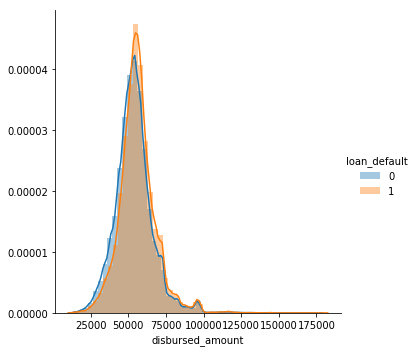

In [ ]:
#Histogram and PDF Analysis
df_train = df_train.loc[df_train["disbursed_amount"]<180000]
sns.FacetGrid(df_train, hue="loan_default", size=5).map(sns.distplot, "disbursed_amount").add_legend()
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


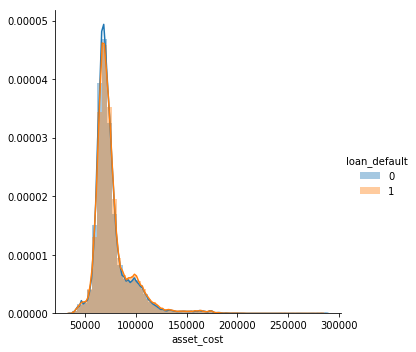

In [ ]:
df_train = df_train.loc[df_train["disbursed_amount"]<180000]
sns.FacetGrid(df_train, hue="loan_default", size=5).map(sns.distplot, "asset_cost").add_legend()
plt.show();

In [ ]:
df_out = df_train.loc[df_train["asset_cost"]>250000]

In [ ]:
df_out

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
46219,473840,164800,264500,64.27,8,21855,51,5576,04-05-87,NaN,...,0,0,2759,0,0,0,2yrs 0mon,2yrs 10mon,0,0
53737,641970,156027,252434,63.78,3,16092,51,579,23-09-90,NaN,...,0,0,0,0,0,0,1yrs 7mon,1yrs 7mon,0,0
92942,652425,176314,259409,69.39,78,16845,51,2047,12-02-77,NaN,...,0,0,0,0,0,1,0yrs 8mon,1yrs 0mon,0,0
94274,441704,167018,251767,67.52,160,22417,51,91,30-07-90,NaN,...,0,0,0,0,0,1,2yrs 1mon,5yrs 8mon,0,0
94368,580461,161608,253589,65.46,160,22417,51,24,12-03-92,NaN,...,0,0,1013,0,0,0,1yrs 5mon,3yrs 0mon,0,0
106002,549458,97990,259000,38.42,2,23348,51,2382,27-06-91,NaN,...,0,0,0,0,0,0,0yrs 10mon,1yrs 5mon,0,1
113758,578331,158358,255398,62.65,74,17020,51,2578,01-09-84,NaN,...,0,0,0,0,2,0,0yrs 2mon,0yrs 2mon,0,0
115043,644043,118218,255315,47.00,136,23432,51,3753,03-01-95,NaN,...,0,0,0,0,0,0,0yrs 8mon,0yrs 8mon,0,1
167303,573734,174351,258214,69.32,138,23103,67,3318,09-06-89,NaN,...,0,0,10820,0,0,1,1yrs 6mon,2yrs 5mon,1,0
168864,447102,179176,281164,65.80,138,14723,51,3392,18-08-69,NaN,...,0,0,12823,0,2,0,1yrs 0mon,2yrs 1mon,0,1


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


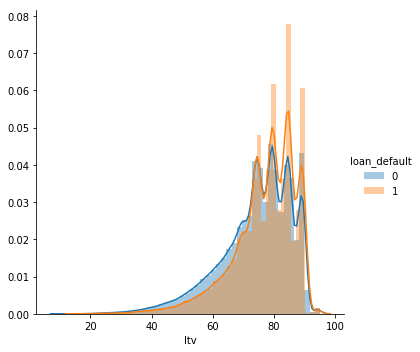

In [ ]:
sns.FacetGrid(df_train, hue="loan_default", size=5).map(sns.distplot, "ltv").add_legend()
plt.show();

In [ ]:
df_outlier = df_train.loc[df_train["ltv"]<20]

In [ ]:
df_outlier

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
813,497986,17850,97311,19.53,11,22976,51,5969,05-09-97,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
823,487455,13990,80776,18.57,11,21475,45,5987,01-01-73,NaN,...,0,0,0,0,0,0,4yrs 6mon,4yrs 6mon,0,0
844,446424,13990,80776,18.57,11,21475,45,5960,16-06-81,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
999,561106,14740,87965,17.05,20,22882,86,6199,12-03-82,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
5510,602392,14140,80100,18.73,1,18080,86,5093,01-01-87,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
9898,475369,14215,78829,19.03,17,20335,86,3228,03-06-91,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
10871,609596,13990,76245,19.67,8,14854,45,5528,01-01-88,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
14297,542497,13990,78127,19.20,152,13890,86,6152,19-11-80,NaN,...,0,0,0,0,0,0,5yrs 6mon,5yrs 6mon,0,0
20602,616917,17850,95822,19.83,48,23698,49,6294,22-05-92,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
32984,612509,28381,158667,18.28,29,15410,49,5868,17-12-90,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/AV_LTFS_Hackathon/test_bqCt9Pv.csv') 

In [ ]:
df_test.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [ ]:
df_train_ = df_train[['disbursed_amount', 'asset_cost', 'ltv', 'State_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']]

In [ ]:
df_test_ = df_test[['disbursed_amount', 'asset_cost', 'ltv', 'State_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']]

In [ ]:
y = df_train[['loan_default']]

In [ ]:
X_train = np.array(df_train_)
y_train = np.array(y).ravel()
X_test = np.array(df_test_)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#xgb_model = XGBClassifier(learning_rate=1).fit(X_train, y_train)
xgb_model = XGBClassifier(eval_metric='auc',learning_rate=1,max_depth = 3,min_child_weight = 10,subsample=1, n_estimators=100,scale_pos_weight=2).fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
#print(xgb_predictions)
xgb_predictions_df = pd.DataFrame(xgb_predictions)
xgb_predictions_df.columns = ['loan_default']

In [ ]:
submt_df = pd.concat([df_test['UniqueID'], xgb_predictions_df], axis = 1)

In [ ]:
xl_writer = pd.ExcelWriter('AV_LTFS.xlsx', engine='xlsxwriter')
submt_df.to_excel(xl_writer, sheet_name='Sheet1', index=False, header=True)
xl_writer.close()